<a href="https://colab.research.google.com/github/rajatktiwari/Pneumonia-Classification-X-Rays-/blob/main/Pneumonia_X_RAY_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing all the required libraries and packages

from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
import os
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import cv2
import tensorflow as tf
import keras
from keras.models import Model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  if sys.path[0] == '':


In [4]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajatkumartiwari","key":"6d9bb6106b2d37dec6737d85fab80a16"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 35.0MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.0MB/s]


In [7]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
#directories where training and testing images are present 
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'


**Training Images with Labels**

In [9]:
X_train = []
y_train = []

In [10]:
os.chdir('/content/chest_xray/train/NORMAL') #changng the directory 

In [11]:
#reading the normal images 
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(255,255))
  X_train.append(img) #loading normal image to X_train
  y_train.append('NORMAL') #label=normal

In [12]:
os.chdir('/content/chest_xray/train/PNEUMONIA')

In [13]:
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(255,255))
  X_train.append(img)
  y_train.append('PNEUMONIA')

In [14]:
print(len(X_train),len(y_train))

5216 5216


**Now Visualizing Normal X-Rays**

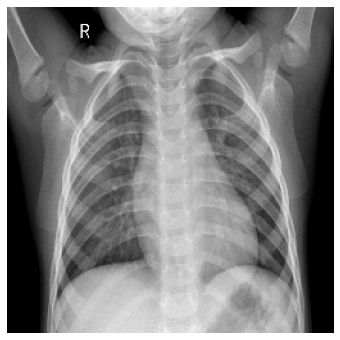

NORMAL


In [15]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[10], cmap="gray")
plt.axis('off')
plt.show()
print(y_train[10])

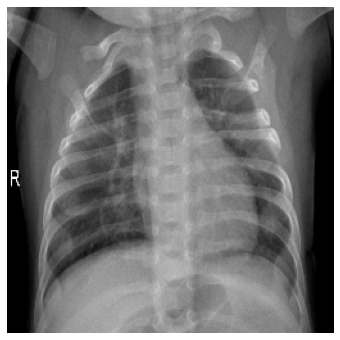

PNEUMONIA


In [16]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[5210],cmap='gray')
plt.axis('off')
plt.show()
print(y_train[5210])

**Model**

In [17]:
vgg19 = VGG19(input_shape=[224,224,3],weights= 'imagenet', include_top=False)
for layers in vgg19.layers:
  layers.trainable=False # there is no need to train the whole layers 
  

80142336/80134624 [==============================] - 1s 0us/step


In [18]:
x = Flatten()(vgg19.output) # Flatten Layer 
output = Dense(2,activation='softmax')(x)

In [19]:
model = Model(inputs=vgg19.input, outputs =output )

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,           #normalizing training images
                                   shear_range = 0.2,          #shear intensity
                                   zoom_range = 0.2,           #zoom in the images
                                   horizontal_flip = True)     #flipping images horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)            #normalizing the testing images

In [26]:
train_data = train_datagen.flow_from_directory(train_dir,                      #target path (training)
                                                target_size = (224, 224),      #fitting data generator having image size (224,224)
                                                 batch_size = 32,              #batch size
                                                 class_mode = 'categorical')   #type of labels

Found 5216 images belonging to 2 classes.


In [27]:
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [36]:
history = model.fit(train_data,validation_data=test_data,epochs=10)  #fitting the model for training with validation data

Epoch 1/10
163/163 [==============================] - 112s 688ms/step - loss: 0.0849 - accuracy: 0.9686 - val_loss: 0.5261 - val_accuracy: 0.8862
Epoch 2/10
163/163 [==============================] - 112s 687ms/step - loss: 0.0730 - accuracy: 0.9734 - val_loss: 0.2957 - val_accuracy: 0.9279
Epoch 3/10
163/163 [==============================] - 111s 682ms/step - loss: 0.0675 - accuracy: 0.9753 - val_loss: 0.5640 - val_accuracy: 0.8814
Epoch 4/10
163/163 [==============================] - 111s 678ms/step - loss: 0.1028 - accuracy: 0.9664 - val_loss: 0.3613 - val_accuracy: 0.9119
Epoch 5/10
163/163 [==============================] - 111s 683ms/step - loss: 0.0795 - accuracy: 0.9712 - val_loss: 0.3856 - val_accuracy: 0.9199
Epoch 6/10
163/163 [==============================] - 112s 684ms/step - loss: 0.0700 - accuracy: 0.9757 - val_loss: 0.4510 - val_accuracy: 0.9071
Epoch 7/10
163/163 [==============================] - 111s 681ms/step - loss: 0.1500 - accuracy: 0.9538 - val_loss: 1.1605 -

**Model Evaluation**

In [38]:
model.evaluate(test_data)

20/20 [==============================] - 6s 311ms/step - loss: 0.6937 - accuracy: 0.8654


[0.6937128901481628, 0.8653846383094788]

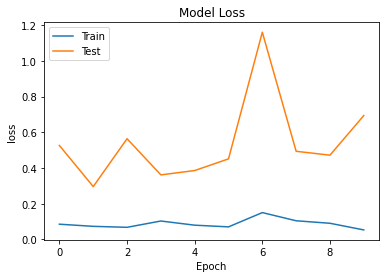

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

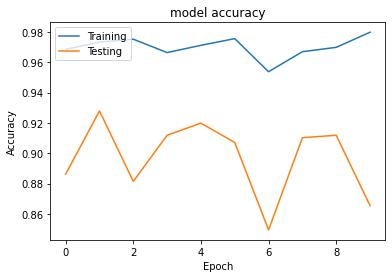

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

In [41]:
model.save('MODEL.h5')